In [1]:
%matplotlib inline

import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [2]:
TRAIN_PATH = 'data/Train/'
TEST_PATH = 'data/Test/'
VALIDATION_PATH = 'data/Validation/'

### Dataset Sizes

- Training Set

In [3]:
!ls {TRAIN_PATH}

A  B  C  Five  Point  V


In [4]:
for class_folder in os.listdir(TRAIN_PATH):
    imgs_paths = glob.glob(f'{TRAIN_PATH}{class_folder}/*.ppm')
    imgs_count = len(imgs_paths)
    print(f'{imgs_count} images of class {class_folder}.')

572 images of class C.
1329 images of class A.
1395 images of class Point.
654 images of class Five.
435 images of class V.
487 images of class B.


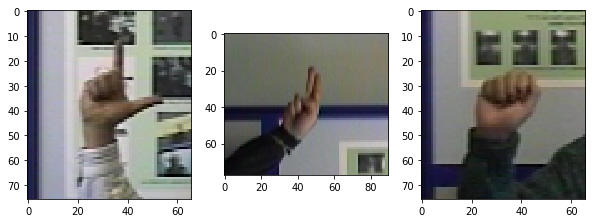

In [5]:
training_paths = glob.glob(f'{TRAIN_PATH}/**/*.ppm', recursive=True)
samples = np.random.choice(training_paths, 3, replace=False)
fig=plt.figure(figsize=(10, 10))
for n, sample in enumerate(samples, 1):
    fig.add_subplot(1, 3, n)
    img = plt.imread(sample)
    plt.imshow(img)
plt.show();

- Test Set

In [6]:
!ls {TEST_PATH}

A  B  C  Five  Point  V


In [7]:
for class_folder in os.listdir(TEST_PATH):
    imgs_paths = glob.glob(f'{TEST_PATH}{class_folder}/complex/*.ppm')
    imgs_paths.extend(glob.glob(f'{TEST_PATH}{class_folder}/uniform/*.ppm'))
    imgs_count = len(imgs_paths)
    print(f'{imgs_count} images of class {class_folder}.')

112 images of class C.
97 images of class A.
119 images of class Point.
134 images of class Five.
95 images of class V.
102 images of class B.


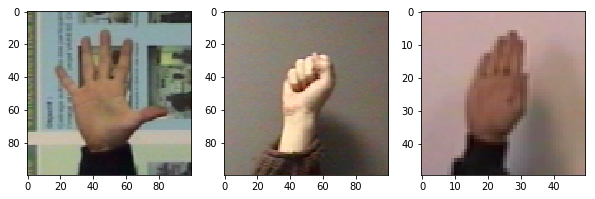

In [8]:
test_paths = glob.glob(f'{TEST_PATH}/**/*.ppm', recursive=True)
samples = np.random.choice(test_paths, 3, replace=False)
fig=plt.figure(figsize=(10, 10))
for n, sample in enumerate(samples, 1):
    fig.add_subplot(1, 3, n)
    img = plt.imread(sample)
    plt.imshow(img)
plt.show();

### Create Validation Set

In [9]:
for class_folder in os.listdir(TRAIN_PATH):
    imgs_paths = glob.glob(f'{TRAIN_PATH}{class_folder}/*.ppm')
    np.random.shuffle(imgs_paths)
    if not os.path.exists(f'{VALIDATION_PATH}'):
        os.mkdir(f'{VALIDATION_PATH}')
    if not os.path.exists(f'{VALIDATION_PATH}{class_folder}/'):
        os.mkdir(f'{VALIDATION_PATH}{class_folder}/')
    for image_path in imgs_paths[:int(len(imgs_paths)*0.2)]:
        shutil.move(image_path, os.path.join(f'{VALIDATION_PATH}{class_folder}', os.path.basename(image_path)))

In [10]:
for class_folder in os.listdir(TRAIN_PATH):
    imgs_paths = glob.glob(f'{TRAIN_PATH}{class_folder}/*.ppm')
    imgs_count = len(imgs_paths)
    print(f'{imgs_count} images of class {class_folder}.')

458 images of class C.
1064 images of class A.
1116 images of class Point.
524 images of class Five.
348 images of class V.
390 images of class B.


In [11]:
for class_folder in os.listdir(VALIDATION_PATH):
    imgs_paths = glob.glob(f'{VALIDATION_PATH}{class_folder}/*.ppm')
    imgs_count = len(imgs_paths)
    print(f'{imgs_count} images of class {class_folder}.')

114 images of class C.
265 images of class A.
279 images of class Point.
130 images of class Five.
87 images of class V.
97 images of class B.
